# Question 1 
### Occupation


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Step 3 Assign it to a variable called users
users = pd.read_csv(r"D:\Bhavya\Academics\BDAT\Data Programming\Problem set 3 files\user.csv")

In [3]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
#Step 4 Discover what is the mean age per occupation
age = users.groupby(['occupation'])['age'].mean()
print(age)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [5]:
#Step 5 For each occupation, calculate the minimum and maximum ages

users[users['gender']=='M'].groupby('occupation')['gender'].value_counts().sort_values(ascending = False)
#users[users['gender']=='M'].groupby('occupation')['gender'].count().sort_values(ascending=False)

occupation     gender
student        M         136
other          M          69
educator       M          69
engineer       M          65
programmer     M          60
administrator  M          43
executive      M          29
scientist      M          28
technician     M          26
writer         M          26
librarian      M          22
marketing      M          16
entertainment  M          16
artist         M          15
retired        M          13
lawyer         M          10
salesman       M           9
doctor         M           7
none           M           5
healthcare     M           5
homemaker      M           1
Name: gender, dtype: int64

In [6]:
#Step 6 For each occupation, calculate the minimum and maximum ages

df = users.groupby(['occupation']).agg({'age':['min', 'max']})
print(df)
print('\n\n')

min_age = users.groupby(['occupation'])['age'].min()
max_age = users.groupby(['occupation'])['age'].max()
df1 = pd.merge(min_age, max_age, how='inner',on='occupation')
print(df1)

              age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60



               age_x  age_y
occupation                 
administrator     21     70
artist            19     48
doctor            28     64
educator          23     63
engineer          22     70
entertainment     15     50
executive         22     69
healthcare        22     62
homemaker         20     50
lawyer            21     53
librarian         23     69
marketing         24     55
none              11     55
other             13     64
programmer        20 

In [7]:
#Step 7 For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [8]:
#Step 8 What is the number of columns in the dataset?
import math
gender = users.groupby(['occupation','gender'])['gender'].count()
percentage = gender.groupby(level=0).apply(lambda x: round(100 * x / x.sum(),2))
percentage

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           7.14
               M  

# Question 2

### Euro Teams

In [9]:
#Step 1
import pandas as pd
import numpy as np

In [10]:
#Step 2 and 3
euro12 = pd.read_csv(r"D:\Bhavya\Academics\BDAT\Data Programming\Problem set 3 files\euro_stats.csv")

In [11]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.90%,16.00%,32,0,0,0,...,13,81.30%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.90%,12.90%,39,0,0,0,...,9,60.10%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.00%,20.00%,27,1,0,0,...,10,66.70%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.00%,17.20%,40,0,0,0,...,22,88.10%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.90%,6.50%,65,1,0,0,...,6,54.60%,36,51,5,6,0,11,11,19


In [12]:
#Step 4 What is the number of columns in the dataset?
pd.DataFrame(euro12['Goals'])

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [13]:
#Step 5 What is the number of columns in the dataset?
teams = euro12['Team'].count()
print("Total number of teams participated in Euro2012 are: ", teams)

Total number of teams participated in Euro2012 are:  16


In [14]:
#Step 6 What is the number of columns in the dataset?
print("Total number of columns in euro stats are:", euro12.shape[1])

Total number of columns in euro stats are: 35


In [15]:
#Step 7 View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [16]:
#Step 8  Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(["Red Cards", "Yellow Cards"])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [17]:
# Step 9. Calculate the mean Yellow Cards given per Team
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [18]:
# Step 10. Filter teams that scored more than 6 goals 
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.80%,15.60%,80,2,1,0,...,10,62.60%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.90%,16.00%,100,0,1,0,...,15,93.80%,102,83,19,11,0,17,17,18


In [19]:
# Step 11. Select the teams that start with G
euro12[euro12['Team'].str[0].isin(['G'])]

#euro12[euro12.Team.str.startswith('G')]["Team"]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.80%,15.60%,80,2,1,0,...,10,62.60%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.70%,19.20%,32,1,1,1,...,13,65.10%,67,48,12,9,1,12,12,20


In [20]:
#Step 12. Select the first 7 columns
euro12.iloc[0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.90%,16.00%,32,0,0,0,...,13,81.30%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.90%,12.90%,39,0,0,0,...,9,60.10%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.00%,20.00%,27,1,0,0,...,10,66.70%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.00%,17.20%,40,0,0,0,...,22,88.10%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.90%,6.50%,65,1,0,0,...,6,54.60%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.80%,15.60%,80,2,1,0,...,10,62.60%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.70%,19.20%,32,1,1,1,...,13,65.10%,67,48,12,9,1,12,12,20


In [21]:
# Step 13. Select all columns except the last 3
euro12.iloc[:, :32]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.90%,16.00%,32,0,0,0,...,0,10,3,13,81.30%,41,62,2,9,0
1,Czech Republic,4,13,18,41.90%,12.90%,39,0,0,0,...,1,10,6,9,60.10%,53,73,8,7,0
2,Denmark,4,10,10,50.00%,20.00%,27,1,0,0,...,1,10,5,10,66.70%,25,38,8,4,0
3,England,5,11,18,50.00%,17.20%,40,0,0,0,...,2,29,3,22,88.10%,43,45,6,5,0
4,France,3,22,24,37.90%,6.50%,65,1,0,0,...,1,7,5,6,54.60%,36,51,5,6,0
5,Germany,10,32,32,47.80%,15.60%,80,2,1,0,...,1,11,6,10,62.60%,63,49,12,4,0
6,Greece,5,8,18,30.70%,19.20%,32,1,1,1,...,1,23,7,13,65.10%,67,48,12,9,1
7,Italy,6,34,45,43.00%,7.50%,110,2,0,0,...,2,18,7,20,74.10%,101,89,16,16,0
8,Netherlands,2,12,36,25.00%,4.10%,60,2,0,0,...,0,9,5,12,70.60%,35,30,3,5,0
9,Poland,2,15,23,39.40%,5.20%,48,0,0,0,...,0,8,3,6,66.70%,48,56,3,7,1


In [22]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
teams = euro12[(euro12.Team == "England") | (euro12.Team == "Italy") | (euro12.Team == "Russia")]
accuracy = teams[["Team","Shooting Accuracy"]]
accuracy

,Team,Shooting Accuracy
3,England,50.00%
7,Italy,43.00%
12,Russia,22.50%


# Question 3
### Housing

In [23]:
# Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

In [24]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000

series1 = pd.Series(np.random.randint(1,4, size=100))
series2 =  pd.Series(np.random.randint(1,3, size=100))
series3 =  pd.Series(np.random.randint(10000,30000, size=100))

print(series1, '\n\n', series2, '\n\n', series3)

0     1
1     1
2     2
3     3
4     2
     ..
95    1
96    2
97    2
98    2
99    3
Length: 100, dtype: int32 

 0     2
1     1
2     2
3     1
4     2
     ..
95    2
96    1
97    1
98    1
99    2
Length: 100, dtype: int32 

 0     22194
1     27620
2     11246
3     22527
4     18498
      ...  
95    18695
96    21898
97    11006
98    13969
99    23550
Length: 100, dtype: int32


In [25]:
# Step 3. Create a DataFrame by joinning the Series by column
dataFrame1 = pd.concat([series1, series2, series3], axis = 1)
dataFrame1

,0,1,2
0,1,2,22194
1,1,1,27620
2,2,2,11246
3,3,1,22527
4,2,2,18498
...,...,...,...
95,1,2,18695
96,2,1,21898
97,2,1,11006
98,2,1,13969


In [26]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df1 = dataFrame1.set_axis(['bedrs', 'bathrs', 'price_sqr_meter'], axis=1, inplace=False)
df1

,bedrs,bathrs,price_sqr_meter
0,1,2,22194
1,1,1,27620
2,2,2,11246
3,3,1,22527
4,2,2,18498
...,...,...,...
95,1,2,18695
96,2,1,21898
97,2,1,11006
98,2,1,13969


In [27]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1,series2,series3],axis=0)
column = bigcolumn.to_frame()
column


,0
0,1
1,1
2,2
3,3
4,2
...,...
95,18695
96,21898
97,11006
98,13969


#### Step 6. Ops it seems it is going only until index 99. Is it true?

Yes we can see the index at end is 99 because in python indexing starts from 0. So for 100 numbers the indexing would be from 0 to 99

In [28]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.index = range(300)
bigcolumn

0          1
1          1
2          2
3          3
4          2
       ...  
295    18695
296    21898
297    11006
298    13969
299    23550
Length: 300, dtype: int32

# Question 4
### Wind Statistics 

In [29]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
import pandas as pd
import numpy as np

data = pd.read_csv(r"D:\Bhavya\Academics\BDAT\Data Programming\Problem set 3 files\wind.csv")
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [30]:
import datetime


date = data.apply(lambda x: datetime.date(int(x['Yr']+1900), int(x['Mo']), int(x['Dy'])),axis=1)

# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

date = date.astype('datetime64[ns]')
data = data.drop(columns=['Yr', 'Mo', 'Dy'])
data.insert(0, 'Date',date)
data.set_index(['Date'], inplace = True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [31]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

null = data.isnull().sum()
print("Number of Null Values are:\n", null)

print('\n\n')
#Step 7. Compute how many non-missing values there are in total.
notnull = data.notnull().sum()
print("Number of non null values are:\n", notnull)

Number of Null Values are:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64



Number of non null values are:
 RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64


In [32]:
data = data.dropna()
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [33]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.mean().mean()

10.222465245951712

In [34]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations 
#of the windspeeds at each location over all the days. A different set of numbers for each location.

#loc_stats = data.iloc[:, 1:]
#loc_stats = pd.concat([locs.min(), locs.max(), locs.mean(), locs.std()], axis = 1)
#loc_stats = loc_stats.rename({0: "Minimum", 1 : "Maximum", 2 : "Mean", 3 : "Standard Deviation"}, axis = 1)

loc_stats = data.describe().T
loc_stats

,count,mean,std,min,25%,50%,75%,max
RPT,6546.0,12.359979,5.618805,0.67,8.12,11.71,15.92,35.80
VAL,6546.0,10.640267,5.268695,0.21,6.67,10.13,14.04,33.37
ROS,6546.0,11.656396,5.007805,1.50,7.97,10.92,14.67,33.84
KIL,6546.0,6.298587,3.600942,0.00,3.58,5.75,8.38,28.46
SHA,6546.0,10.448923,4.933988,0.13,6.75,9.96,13.54,37.54
BIR,6546.0,7.085066,3.967735,0.00,4.00,6.83,9.67,26.16
DUB,6546.0,9.793006,4.978030,0.00,6.00,9.21,12.96,30.37
CLA,6546.0,8.486601,4.498299,0.00,5.09,8.08,11.42,31.08
MUL,6546.0,8.490257,4.165947,0.00,5.37,8.17,11.17,25.88
CLO,6546.0,8.696705,4.500488,0.04,5.33,8.25,11.58,28.21


In [35]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the
# windspeeds across all the locations at each day.

day_stats = pd.DataFrame()

day_stats['Min values']=data.min(axis=1)
day_stats['Max values']=data.max(axis=1)
day_stats['Average']=data.mean(axis=1)
day_stats['Standard Deviation']=data.std(axis=1)
day_stats

,Min values,Max values,Average,Standard Deviation
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [36]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

WindSpeedInJan = data[data.index.month == 1]
WindSpeedInJan.mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [37]:
# Step 12. Downsample the record to a yearly frequency for each location
data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962-12-31,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [38]:
# Step 13. Downsample the record to a monthly frequency for each location.
data.resample('m').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02-28,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03-31,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [39]:
# Step 14. Downsample the record to a weekly frequency for each location.
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [40]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations 
# for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

weeks = data.resample('W').agg(['min','max','mean','std'])
weeks.head(5).T

Date      1961-01-08  1961-01-15  1961-01-22  1961-01-29  1961-02-05
RPT min    10.580000    9.040000    4.920000   13.620000   10.580000
    max    13.500000   19.750000   17.750000   25.040000   24.210000
    mean   12.316000   12.468571   12.100000   19.880000   16.827143
    std     1.421418    3.555392    4.893064    4.619061    5.251408
VAL min     6.630000    3.540000    3.420000    9.960000    9.460000
    max    14.290000   12.080000   14.370000   20.790000   24.210000
    mean   10.408000    8.967143    9.500000   14.846667   15.460000
    std     3.282076    3.148945    4.070420    4.242125    5.187395
ROS min     7.620000    7.080000    7.290000   12.670000    9.040000
    max    11.750000   19.500000   17.330000   25.840000   19.700000
    mean   10.050000   11.958571   11.681667   17.548333   12.618571
    std     1.656985    5.034959    4.101421    4.719091    3.975166
KIL min     4.580000    0.670000    1.040000    6.040000    5.090000
    max     6.670000   10.540000   10.130000   16.210000   11.960000
    mean    5.658000    4.630000    4.293333   11.916667    8.247143
    std     0.865893    3.549559    3.466079    4.096436    2.709106
SHA min     4.540000    2.290000    3.670000   10.000000    9.870000
    max    12.290000   10.370000   13.960000   21.460000   17.370000
    mean    8.506000    7.351429    8.966667   16.325000   13.361429
    std     3.390462    3.471726    3.612875    4.244035    2.334619
BIR min     2.880000    0.960000    3.170000    9.420000    5.830000
    max     8.330000    9.460000   13.370000   18.580000   12.040000
    mean    6.242000    5.072857    6.938333   14.016667    9.107143
    std     2.432523    3.251039    3.519326    3.366385    2.397066
DUB min     8.630000    2.500000    3.170000    9.250000    8.500000
    max    14.290000   15.540000   13.420000   20.380000   14.880000
    mean   10.936000    7.535714    7.828333   14.450000   12.204286
    std     2.276221    4.709309    3.857488    3.823543    2.423454
CLA min     1.790000    0.580000    2.790000    8.710000    3.630000
    max     9.290000   11.500000   11.040000   19.380000   15.540000
    mean    5.932000    6.820000    7.291667   14.311667    8.548571
    std     2.912794    3.936894    3.025765    4.191761    4.081158
MUL min     5.830000    0.500000    1.920000    7.120000    6.340000
    max    10.920000   10.370000    8.710000   18.660000   13.370000
    mean    8.150000    5.712857    5.891667   13.316667    9.821429
    std     1.971712    3.500975    2.765440    4.179486    2.802490
CLO min     5.880000    2.670000    2.710000   11.040000    5.500000
    max    10.460000   14.580000   11.380000   19.080000   13.130000
    mean    8.428000    7.571429    6.693333   14.921667    9.460000
    std     1.959418    4.084293    3.203652    3.494638    2.839501
BEL min     5.460000    5.250000    6.500000   14.040000    9.170000
    max    16.620000   20.710000   15.920000   26.080000   19.330000
    mean   11.416000   11.125714    9.993333   19.800000   14.012857
    std     4.531918    5.552215    3.941358    4.675044    4.210858
MAL min    10.880000    5.170000    6.790000   17.500000    7.170000
    max    16.460000   16.920000   16.080000   27.630000   19.250000
    mean   13.226000   11.024286   10.346667   22.388333   11.935714
    std     2.134978    4.692355    3.407132    4.224639    4.336104

# Question 5

In [41]:
import pandas as pd
import numpy as np

chipo = pd.read_csv(r"D:\Bhavya\Academics\BDAT\Data Programming\Problem set 3 files\chipotle.csv")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [42]:
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [43]:
# Step 5. What is the number of observations in the dataset?
chipo.size

23110

In [44]:
# Step 6. What is the number of columns in the dataset?
chipo.shape

(4622, 5)

In [45]:
chipo.columns.size

5

In [46]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [47]:
# Step 7. Print the name of all the columns

for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


In [48]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [49]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [50]:
# Step 9. Which was the most-ordered item?
# Step 10. For the most-ordered item, how many items were ordered
chipo.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

### Chicken Bowl is the most ordered item and order count is 726

In [51]:
# Step 11. What was the most ordered item in the choice_description column?
choice_description = chipo.choice_description.value_counts()
choice_description[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

In [52]:
# Step 12. How many items were orderd in total?
chipo.quantity.sum()

4972

#### Step 13.
    • Turn the item price into a float
    • Check the item price type
    • Create a lambda function and change the type of item price
    • Check the item price type

In [53]:
print(chipo.dtypes)

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


In [54]:
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))
chipo["item_price"].dtypes

dtype('float64')

In [56]:
# Step 14. How much was the revenue for the period in the dataset?
chipo['total_revenue'] = chipo["quantity"] * chipo["item_price"]
total_revenue = chipo.total_revenue.sum()
print("Total Revenue is $", total_revenue)

Total Revenue is $ 39237.02


In [57]:
# Step 15. How many orders were made in the period?
len(chipo['order_id'].unique())

1834

In [58]:
# Step 16. What is the average revenue amount per order?
chipo.groupby("order_id")["total_revenue"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: total_revenue, Length: 1834, dtype: float64

In [59]:
# Step 17. How many different items are sold?
print("Total unique items: ", len(chipo["item_name"].unique()))

Total unique items:  50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend

In [60]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt  
sns.set(color_codes=True)
%matplotlib inline 

In [61]:
marriage_divorces = pd.read_csv(r"D:\Bhavya\Academics\BDAT\Data Programming\Problem set 3 files\us-marriages-divorces.csv")

In [62]:
marriage_divorces

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


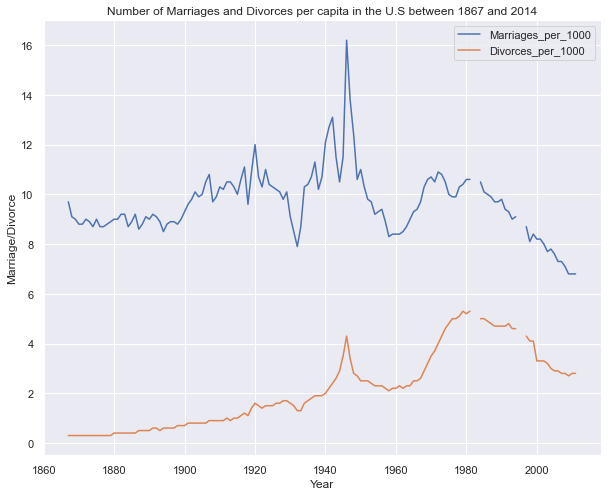

In [63]:
marriage_divorces.plot.line(x = "Year", y = ["Marriages_per_1000", "Divorces_per_1000"],figsize = (10,8))
plt.title("Number of Marriages and Divorces per capita in the U.S between 1867 and 2014")
plt.xlabel("Year")
plt.ylabel("Marriage/Divorce")
plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.


Text(0.5, 1.0, 'US Marriages & Divorces Data')

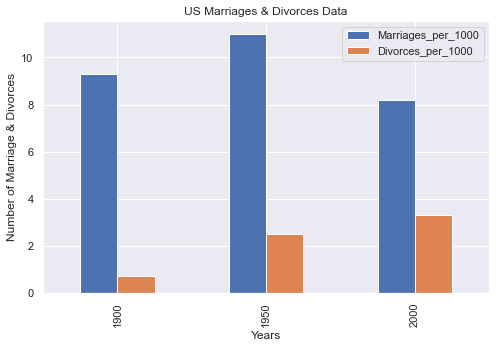

In [64]:
us_data = marriage_divorces[(marriage_divorces.Year == 1900) | (marriage_divorces.Year == 1950) | (marriage_divorces.Year == 2000)]
us_data = us_data.drop(columns = ['Marriages', 'Divorces', 'Population'])
us_data = us_data.set_index('Year')

# sns.barplot(data = us_data, x = 'Year', y = ["Marriages_per_1000", "Divorces_per_1000"])
us_data.plot.bar(figsize = (8, 5))

plt.xlabel('Years')
plt.ylabel('Number of Marriage & Divorces')
plt.title('US Marriages & Divorces Data')

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.


In [65]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt  
sns.set(color_codes=True)
%matplotlib inline 

In [66]:
actors = pd.read_csv(r"D:\Bhavya\Academics\BDAT\Data Programming\Problem set 3 files\actor_kill_counts.csv")

In [67]:
actors

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


Text(0.5, 1.0, 'Kill count of Hollywood Actors')

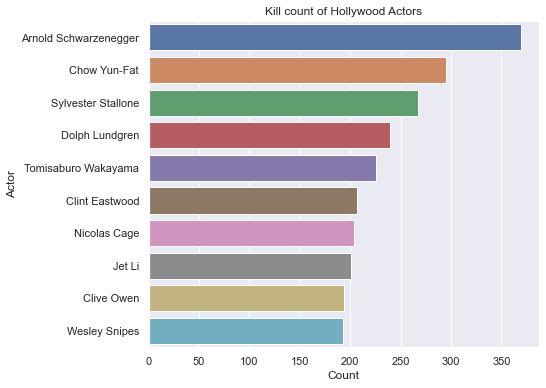

In [68]:
new = actors.sort_values(by = "Count", ascending = False)
plt.figure(figsize = (7,6))
sns.barplot(data = new, y = "Actor", x = "Count", orient = 'h')
plt.title("Kill count of Hollywood Actors")

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [69]:
roman_emporers = pd.read_csv(r"D:\Bhavya\Academics\BDAT\Data Programming\Problem set 3 files\roman-emperor-reigns.csv")
roman_emporers

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


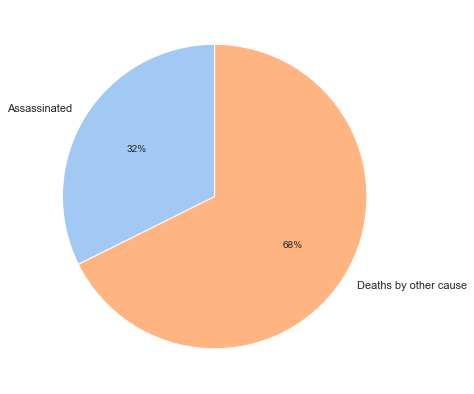

In [70]:
assasinated = roman_emporers[roman_emporers['Cause_of_Death'] == "Assassinated"]
plt.figure(figsize =(11, 7))

colors = sns.color_palette('pastel')
plt.pie([len(assasinated),len(roman_emporers) - len(assasinated)], labels = ['Assassinated', 'Deaths by other cause'],
        startangle = 90, colors = colors, autopct='%.0f%%')
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

In [71]:
df = pd.read_csv(r"D:\Bhavya\Academics\BDAT\Data Programming\Problem set 3 files\arcade-revenue-vs-cs-doctorates.csv")

In [72]:
df

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0.5, 1.0, 'Total Arcade Revenue and Computer Science Doctorates Awarded (US) between 2000 and 2009.\n')

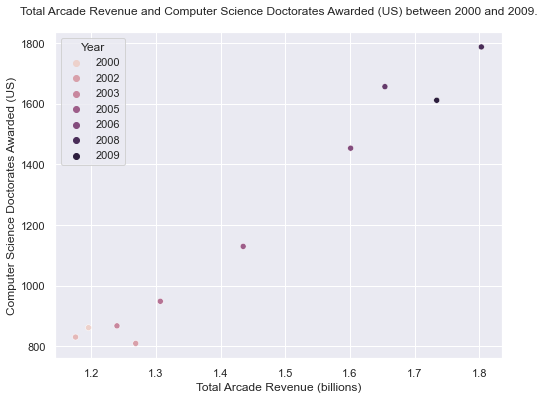

In [73]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df, x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', 
                hue='Year').set_title('Total Arcade Revenue and Computer Science Doctorates Awarded (US) between 2000 and 2009.\n')